In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\admin\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


ModuleNotFoundError: No module named 'pydotplus'

In [2]:
pd.set_option("display.max_rows",None)

In [3]:
data = pd.read_csv("C://Users//admin//Desktop//DEcision Random Ensembled//Decision tree//decision Tree ExcelR//Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
data.isnull().sum() 

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
bins = [0,30000,99619.000000]
labels = ['A','B']
data['Taxable.Income1'] = pd.cut(data['Taxable.Income'], bins=bins, labels=labels)


In [9]:
data1 = data.drop(columns = 'Taxable.Income')
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income1
0,NO,Single,50047,10,YES,B
1,YES,Divorced,134075,18,YES,B
2,NO,Married,160205,30,YES,B
3,YES,Single,193264,15,YES,B
4,NO,Married,27533,28,NO,B
5,NO,Divorced,116382,0,NO,B
6,NO,Divorced,80890,8,YES,B
7,YES,Single,131253,3,YES,B
8,NO,Single,102481,12,YES,B
9,YES,Divorced,155482,4,YES,B


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
oh_enc = OneHotEncoder(sparse=False)

In [15]:
oh_enc_arr = oh_enc.fit_transform(data1[['Undergrad','Marital.Status','Urban']])
oh_enc_arr

array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [16]:
data1.keys()

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable.Income1'],
      dtype='object')

In [17]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=[  'Undergrad_No', 'Undergrad_Yes', 'Divorced',
       'Married', 'Single', 'Urban_No', 'Urban_Yes'])
oh_enc_df

,Undergrad_No,Undergrad_Yes,Divorced,Married,Single,Urban_No,Urban_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [19]:
new_data=data1.drop(columns=['Undergrad','Marital.Status','Urban'])

In [20]:
new_data['Undergrad_No']=oh_enc_df['Undergrad_No'].to_list()
new_data['Undergrad_Yes']=oh_enc_df['Undergrad_Yes'].to_list()
new_data['Divorced']=oh_enc_df['Divorced'].to_list()
new_data['Married']=oh_enc_df['Married'].to_list()
new_data['Single']=oh_enc_df['Single'].to_list()
new_data['Urban_No']=oh_enc_df['Urban_No'].to_list()
new_data['Urban_Yes']=oh_enc_df['Urban_Yes'].to_list()
new_data

,City.Population,Work.Experience,Taxable.Income1,Undergrad_No,Undergrad_Yes,Divorced,Married,Single,Urban_No,Urban_Yes
0,50047,10,B,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,134075,18,B,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,160205,30,B,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,193264,15,B,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27533,28,B,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,116382,0,B,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,80890,8,B,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,131253,3,B,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,102481,12,B,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,155482,4,B,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [21]:
new_data.isnull().sum() 

City.Population    0
Work.Experience    0
Taxable.Income1    0
Undergrad_No       0
Undergrad_Yes      0
Divorced           0
Married            0
Single             0
Urban_No           0
Urban_Yes          0
dtype: int64

In [22]:
new_data.dtypes

City.Population       int64
Work.Experience       int64
Taxable.Income1    category
Undergrad_No        float64
Undergrad_Yes       float64
Divorced            float64
Married             float64
Single              float64
Urban_No            float64
Urban_Yes           float64
dtype: object

In [23]:
X = new_data.drop(columns = 'Taxable.Income1')
y = new_data['Taxable.Income1']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [25]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['City.Population',
 'Work.Experience',
 'Undergrad_No',
 'Undergrad_Yes',
 'Divorced',
 'Married',
 'Single',
 'Urban_No',
 'Urban_Yes']

In [27]:
clf.score(x_train,y_train)

1.0

In [28]:
py_pred = clf.predict(x_test)

In [29]:
clf.score(x_test,y_test)

0.6833333333333333

In [30]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

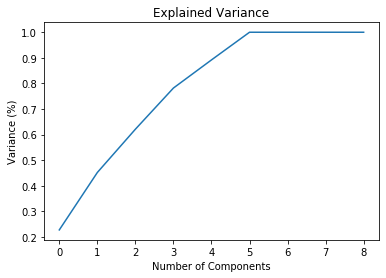

In [33]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()


In [34]:
pca = PCA(n_components=5)
new_data3 = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data3,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [35]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-1.108117,2.000055,1.469786,-0.445863,1.005264
1,-1.300132,-0.695264,-0.556165,2.090071,-0.667073
2,-0.590435,1.636874,-1.506860,-1.171460,-1.980887
3,-2.029062,-0.969828,1.316619,-0.087151,-1.429417
4,1.880707,0.910104,-1.219222,-1.670059,0.678071
5,2.009860,0.969761,-0.026300,1.480381,0.835629
6,-0.423042,2.078957,-0.367427,1.831330,0.587419
7,-2.200844,-0.756597,1.352020,0.024729,0.337899
8,-1.069415,1.861147,1.471451,-0.445124,0.014367
9,-1.478114,-0.676697,-0.498018,2.263768,-0.155949


In [36]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6722222222222223

In [37]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [38]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [39]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [40]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 7, 'splitter': 'random'}


In [41]:
grid_search.best_score_

0.7714285714285715

In [44]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =5, min_samples_leaf= 8, min_samples_split= 7, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [45]:
clf.score(x_test,y_test)*100

85.55555555555556